# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete_df = pd.merge(study_results_df, mouse_metadata_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [44]:
# Checking the number of mice.
count_mice = len(study_data_complete_df["Mouse ID"].unique())

count_mice

249

In [45]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_m_ID = study_data_complete_df[study_data_complete_df.duplicated(["Mouse ID", "Timepoint"])]
print(duplicate_m_ID)
print("-----")
unique_dupe_m_ID = duplicate_m_ID["Mouse ID"].unique()

print(unique_dupe_m_ID)

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
137      g989          0           45.000000                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
869      g989         15           53.442020                 0     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
137   Female          21          26  
360   Female          21          26  
681   Female          21          26  
869   Female          21          26  
1111  Female          21          26  
-----
['g989']


In [46]:
# Optional: Get all the data for the duplicate mouse ID. 

dupe_dataID_df = study_data_complete_df[study_data_complete_df["Mouse ID"] ==    unique_dupe_m_ID[0]]

dupe_dataID_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

nodupes_study_data_df= study_data_complete_df[study_data_complete_df["Mouse ID"] != unique_dupe_m_ID[0]]
nodupes_study_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [48]:
# Checking the number of mice in the clean DataFrame.

nodupes_count_mice = len(nodupes_study_data_df["Mouse ID"].unique())

nodupes_count_mice


248

## Summary Statistics

In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = nodupes_study_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
                                            #,"Mouse ID"])["Tumor Volume (mm3)"].mean()
median_tumor = nodupes_study_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
                                              #,"Mouse ID"])["Tumor Volume (mm3)"].median()
var_tumor = nodupes_study_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_tumor = nodupes_study_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor = nodupes_study_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
mouse_study_summary_df = pd.DataFrame ({"Mean Tumor Volume": mean_tumor,
                             "Median Tumor Volume": median_tumor,
                             "Tumor Volume Variance": var_tumor,
                             "Tumor Volume Std. Dev.": std_tumor,
                             "Tumor Volume Std. Err.": sem_tumor})

mouse_study_summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [50]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

aggregate_target_column = "Tumor Volume (mm3)"
mouse_study_summary_df2 = nodupes_study_data_df.groupby(['Drug Regimen']).agg({aggregate_target_column:['mean', 'median', 'var', 'std', 'sem']})

mouse_study_summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [51]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#
#ask1 > isolate total number of rows by "drug regimen" (DATA ALIGNMENT/Cleaning to MouseID/Timepoints ... done ... via removal of the dupes ... in ... nodupes_study_data_df) ...
     # Total rows for each "drug regimen" ... Executed via .value_counts() of ... nodupes_study_data_df['Drug Regimen']
     # nodupes_study_data_df['Drug Regimen'].value_counts()
#ask2 > Plot it ... using pandas.plot() functionality ... see url => https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
#pers2a > Need to map in the "Xrun" + "yHeight" params ... 

#execution_ask1#
regimen_counting_data = nodupes_study_data_df['Drug Regimen'].value_counts()
plot_sanchk_data = pd.DataFrame(enumerate(nodupes_study_data_df['Drug Regimen'].values),columns=["Enumerate_Idx","DataValues_Drug Regimen"])     #index="newDF_Index",columns=["Enumerate_Idx","DataValues_Drug Regimen"])
plot_sanchk_data_countmax_rows = plot_sanchk_data.nunique("index",dropna=True)[0]   # len(sanchk_data.nunique("index",dropna=True)[0])
plot_sanchk_data_countmax_unique_data = plot_sanchk_data.nunique("index",dropna=True)[1]     # len(sanchk_data.nunique("index",dropna=True)[1])  #Note =>  "index" .. is "0" .. for the axis .. it's the default function but I'll want to manipulate it later on ... 

print(regimen_counting_data)
print(plot_sanchk_data)
print(f"The Enumerate Function has calculated that there are the following amount of Row eligible to be plotted:\n{plot_sanchk_data_countmax_rows}\n")
print(F"The Enumerate Function has observed that there are the following amount of Unique Data Values within the OptionSet targeted for the plot:\n{plot_sanchk_data_countmax_unique_data}\n")


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64
      Enumerate_Idx DataValues_Drug Regimen
0                 0               Capomulin
1                 1                Ketapril
2                 2                Ketapril
3                 3                Ketapril
4                 4                Ketapril
...             ...                     ...
1875           1875               Capomulin
1876           1876               Capomulin
1877           1877                Ceftamin
1878           1878                 Placebo
1879           1879                Stelasyn

[1880 rows x 2 columns]
The Enumerate Function has calculated that there are the following amount of Row eligible to be plotted:
1880

The Enumerate Function has observed that there are the following amount of Unique Data Values within the OptionSet targeted for the p

In [52]:
# Map the X-axis and Y-axis to VARs for the Plot Function (I understand this isn't necessary with Pandas.Plot() ... but for my typical work I must always know what these values are since the data table is "live" and shared by "many teams" ... from a traceability to "ownership" perspective ... )
#

Xrun_plot1 = nodupes_study_data_df[["Mouse ID", "Timepoint","Drug Regimen"]].groupby(['Drug Regimen']).count()   #["Mouse ID", "Timepoint"].count()     #value_counts()
#yHeight_plot1 = 

print(Xrun_plot1) # KEY OBSERVATION => This has produced the "same result" ... as the "regimen_counting_data" VAR above ... I just needed to "confirm" and "contrast" ... to be sure of the "why that is so ... " ... b/c of the "to what end" Qs that typically come from Staff + Management ... 


#2# 
#
#plt3_X_run = average_pressure_by_month_df.index
#plt3_y_height = average_pressure_by_month_df
#
#print(f"The X_run values are:{plt3_X_run}\n\nand\n\nThe y_height values are:{plt3_y_height}")
#print("\n------\n")

              Mouse ID  Timepoint
Drug Regimen                     
Capomulin          230        230
Ceftamin           178        178
Infubinol          178        178
Ketapril           188        188
Naftisol           186        186
Placebo            181        181
Propriva           148        148
Ramicane           228        228
Stelasyn           181        181
Zoniferol          182        182


In [53]:
#4# Adjust Plot with MatPlotLib functionality ...
#
#fig2_title = plt.title('Coldest and Hottest Months on Mars Sorted by Temperatures') #Note => Copied from different BP to other pieces below ... 
#plt.xlabel("Martian Month")
#plt.ylabel("Average Air Pressure")
#plt.xticks(plt3_X_run)
#plt.legend(loc="upper left")
#plt.show(Average_pressure_plot)

In [54]:
regimen_counting_data.head()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Name: Drug Regimen, dtype: int64

In [55]:
#nodupes_study_data_df['Drug Regimen'].value_counts()

Xrun = nodupes_study_data_df.index.values    #['Drug Regimen'].index.values
#... NOTE ... it appears both produce the "same array"
#because it's the "same" ... I'd target the specific column  then ... adds more readability to the code for me ... 
Total_values_within_Xrun = len(Xrun)#.astype("int32")

Xrun_test2_timept = nodupes_study_data_df[["Mouse ID", "Timepoint"]].index.values  #Produces the SAME ... array as the ".index.values" ... data on the entire DF ... 
Total_values_within_Xrun2 = len(Xrun_test2_timept)

Xrun_test3 = regimen_counting_data.index.values  #Produces the SAME ... array as the ".index.values" ... data on the entire DF ... 
Total_values_within_Xrun3 = len(Xrun_test3)

Xrun_test4 = regimen_counting_data.index  #Produces the SAME ... array as the ".index.values" ... data on the entire DF ... 
Total_values_within_Xrun4 = len(Xrun_test4)


print(Xrun)
print(Total_values_within_Xrun)
print("+-+-+-+-+")
print(Xrun_test2_timept)
print(Total_values_within_Xrun2)
print("+-+-+-+-+")
print(Xrun_test3)
print(Total_values_within_Xrun3)
print("+-+-+-+-+")
print(Xrun_test4)
print(Total_values_within_Xrun4)

[   0    1    2 ... 1890 1891 1892]
1880
+-+-+-+-+
[   0    1    2 ... 1890 1891 1892]
1880
+-+-+-+-+
['Capomulin' 'Ramicane' 'Ketapril' 'Naftisol' 'Zoniferol' 'Stelasyn'
 'Placebo' 'Infubinol' 'Ceftamin' 'Propriva']
10
+-+-+-+-+
Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object')
10


In [56]:
#nodupes_study_data_df['Drug Regimen'].value_counts()

yHeight = nodupes_study_data_df['Drug Regimen'].values   #Creates a "series of" ... the column being targeted ... 
Total_values_within_yHeight = len(yHeight)#.astype("int32")

yHeight2 = regimen_counting_data.values
Total_values_within_yHeight2 = len(yHeight2)#.astype("int32")
#yHeight
print(yHeight)
print(Total_values_within_yHeight)
print("+-+-+-+-+")
print(yHeight2)
print(Total_values_within_yHeight2)


['Capomulin' 'Ketapril' 'Ketapril' ... 'Ceftamin' 'Placebo' 'Stelasyn']
1880
+-+-+-+-+
[230 228 188 186 182 181 181 178 178 148]
10


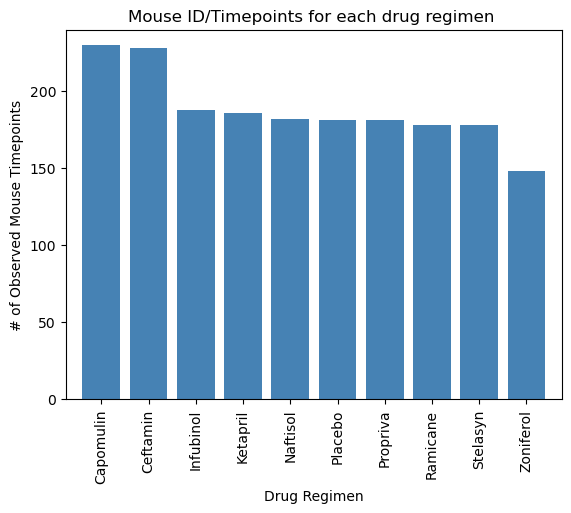

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

Mouse = nodupes_study_data_df.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending= False)
x_axis = np.arange(len(Mouse))
plt.bar(x_axis, Mouse, color="steelblue", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"])
plt.xticks(rotation=90)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(Mouse)+10)
plt.title("Mouse ID/Timepoints for each drug regimen ")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

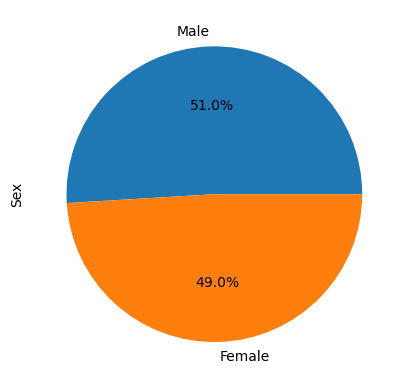

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sizes = nodupes_study_data_df["Sex"].value_counts()
sizes.plot(kind="pie", autopct ="%1.1f%%")
plt.show()

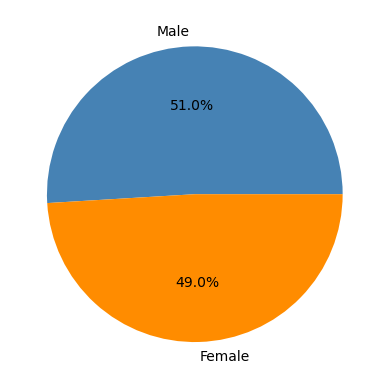

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male","Female"]

# The values of each section of the pie chart
sizes = nodupes_study_data_df["Sex"].value_counts()

# The colors of each section of the pie chart
colors = ["steelblue", "darkorange"]

# Creates the pie chart based upon the values above 
# Automatically finds the percentages of each part of the pie chart

plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Last_timepoint = nodupes_study_data_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Last_timepoint_complete = pd.merge(Last_timepoint, nodupes_study_data_df, how="inner", on=["Mouse ID", "Timepoint"])
Last_timepoint_complete


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [61]:
# Put treatments into a list for for loop (and later for plot labels)
list_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
List_tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in list_treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes   
    subset = Last_timepoint_complete.loc[Last_timepoint_complete['Drug Regimen'] == drug, ['Tumor Volume (mm3)']]
    #print(subset)
    
    # add subset 
    List_tumor_data.append(subset)
    
    # Determine outliers using upper and lower bounds
    quartiles = subset['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    
    outlier_tumor_vol  = subset[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]
    print(f"{drug}'s potential outliers: {outlier_tumor_vol['Tumor Volume (mm3)']}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\Aolda\AppData\Local\Temp\ipykernel_23136\1929410328.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(list_treatments)


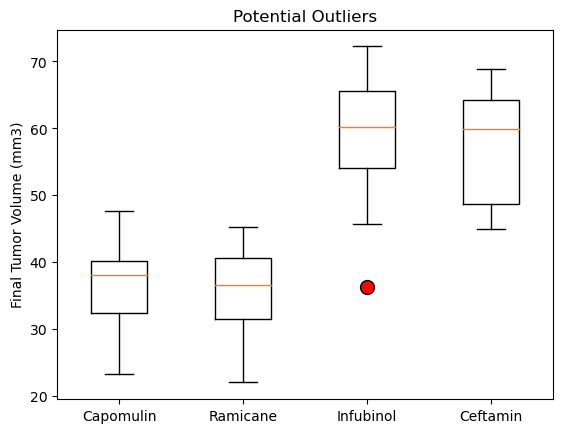

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

Distribution = [List_tumor_data[0].values.flatten(),List_tumor_data[1].values.flatten(),List_tumor_data[2].values.flatten(),List_tumor_data[3].values.flatten()]

#print(Distribution)

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(list_treatments)
ax1.boxplot(Distribution, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 10})
ax1.set_title('Potential Outliers')
plt.show()  

## Line and Scatter Plots

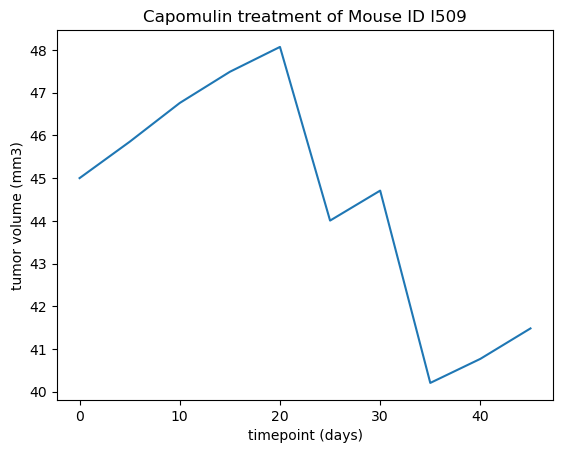

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Mouse1 = 'l509'
column = 'Mouse ID'
Capomulin_list  = nodupes_study_data_df.loc[nodupes_study_data_df[column] == Mouse1]

x = Capomulin_list["Timepoint"]
y = Capomulin_list["Tumor Volume (mm3)"]

fig, ax = plt.subplots()
plt.plot(x, y, linewidth=1.5)

plt.title("Capomulin treatment of Mouse ID l509")
plt.xlabel("timepoint (days)")
plt.ylabel("tumor volume (mm3)")
plt.show()

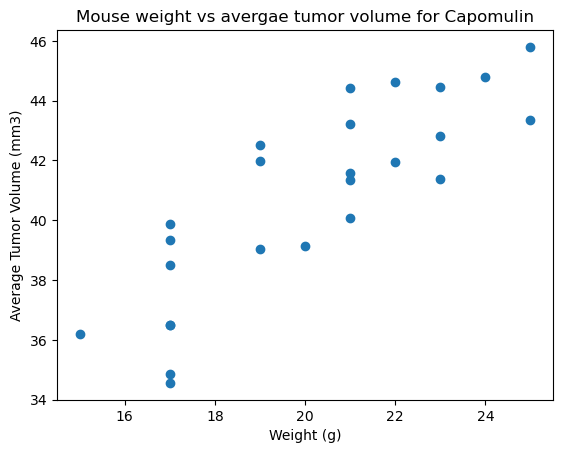

In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Drug1 = 'Capomulin'
column1 = 'Drug Regimen'

Capomulin_list2 = nodupes_study_data_df.loc[nodupes_study_data_df[column1] == Drug1]
Average_tumor_volume = Capomulin_list2.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean()
w = Capomulin_list2.groupby(["Mouse ID","Weight (g)"])["Weight (g)"].mean()

x = w.values
y = Average_tumor_volume.values


plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Mouse weight vs avergae tumor volume for Capomulin')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the avergae tumor volume is 0.84


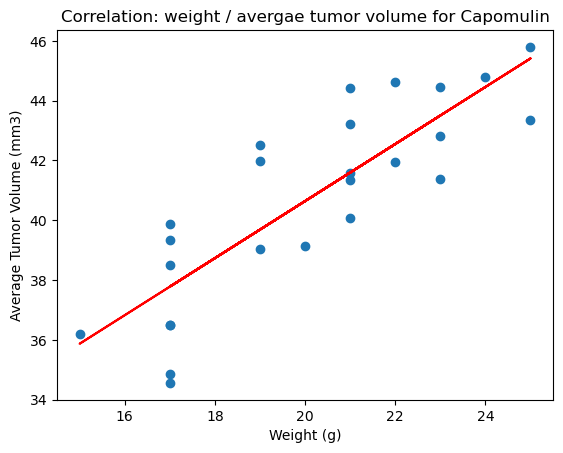

In [65]:
# Calculate the correlation coefficient and a linear regression model 

print(f"The correlation between mouse weight and the avergae tumor volume is {round(st.pearsonr(y,x)[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen

res = linregress(x, y, alternative='greater')
plt.plot(x, res.intercept + res.slope*x , 'r')
plt.scatter(x,y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Correlation: weight / avergae tumor volume for Capomulin')
plt.show()
